In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Loading the Dataset.

In [2]:
fDF=pd.read_csv("FlightDataWebscrape.csv")

In [3]:
fDF.head(50)

,Unnamed: 0,Airline,Flight Number,Date of Departure,From,To,Duration,Total Stops,Price
0,0,Air Asia,I5-764,"Tue, Feb 8",New Delhi,Mumbai,2h 10m,Non Stop,"2,456"
1,1,IndiGo,6E-2054,"Tue, Feb 8",New Delhi,Mumbai,2h 10m,Non Stop,"2,456"
2,2,IndiGo,6E-5001,"Tue, Feb 8",New Delhi,Mumbai,2h 10m,Non Stop,"2,456"
3,3,IndiGo,6E-2046,"Tue, Feb 8",New Delhi,Mumbai,2h 10m,Non Stop,"2,456"
4,4,IndiGo,6E-5328,"Tue, Feb 8",New Delhi,Mumbai,2h 15m,Non Stop,"2,456"
5,5,Air Asia,I5-482,"Tue, Feb 8",New Delhi,Mumbai,2h 15m,Non Stop,"2,456"
6,6,IndiGo,6E-6278,"Tue, Feb 8",New Delhi,Mumbai,2h 20m,Non Stop,"2,456"
7,7,IndiGo,6E-218,"Tue, Feb 8",New Delhi,Mumbai,2h 20m,Non Stop,"2,456"
8,8,IndiGo,6E-171,"Tue, Feb 8",New Delhi,Mumbai,2h 25m,Non Stop,"2,456"
9,9,IndiGo,6E-2081,"Tue, Feb 8",New Delhi,Mumbai,2h 25m,Non Stop,"2,456"


In [4]:
fDF.shape

(2585, 9)

#### checking for null values

In [5]:
fDF.isnull().sum()

Unnamed: 0           0
Airline              0
Flight Number        0
Date of Departure    0
From                 0
To                   0
Duration             0
Total Stops          0
Price                0
dtype: int64

There are no null values in dataset.

#### Checking for blank spaces, random characters in each column

In [6]:
search =[" ","-",]

for c in fDF:
    for s in search:
        print(f"{s} in {c} = ",end= " ")
        print((fDF[c] == s).sum())

  in Unnamed: 0 =  0
- in Unnamed: 0 =  0
  in Airline =  0
- in Airline =  0
  in Flight Number =  0
- in Flight Number =  0
  in Date of Departure =  0
- in Date of Departure =  0
  in From =  0
- in From =  0
  in To =  0
- in To =  0
  in Duration =  0
- in Duration =  0
  in Total Stops =  0
- in Total Stops =  0
  in Price =  0
- in Price =  0


There are no blank spaces, random characters  in columns of train dataset

### Dataframe Description:

Problem Statement:

Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest 
available ticket on a given flight gets more and less expensive over time. This usually happens as 
an attempt to maximize revenue based on -
1. Time of purchase patterns (making sure last-minute purchases are expensive)
2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order 
to reduce sales and hold back inventory for those expensive last-minute expensive purchases)

A Predictive Model is needed to be built using collected data to predict fares of flights.

Size of Data set: 2585 records

### FEATURES:

Airline: The name of the airline.

Flight Number: Number of Flight

Date of Departure: The date of the journey

From: The source from which the service begins.

To: The destination where the service ends.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

   
### Target / Label Column:
    
Price: The price of the ticket

 



#### Getting the basic summary and statistical information of the data.

In [7]:
fDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2585 entries, 0 to 2584
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         2585 non-null   int64 
 1   Airline            2585 non-null   object
 2   Flight Number      2585 non-null   object
 3   Date of Departure  2585 non-null   object
 4   From               2585 non-null   object
 5   To                 2585 non-null   object
 6   Duration           2585 non-null   object
 7   Total Stops        2585 non-null   object
 8   Price              2585 non-null   object
dtypes: int64(1), object(8)
memory usage: 181.9+ KB


In [8]:
fDF.nunique() #the number of unique values in each column

Unnamed: 0           2585
Airline                10
Flight Number        1304
Date of Departure      47
From                   26
To                     27
Duration              442
Total Stops             7
Price                 833
dtype: int64

####  Data Cleaning

In [9]:
fDF['Total Stops'].value_counts()

1-stop       1051
1 Stop        585
Non Stop      583
non-stop      271
2+-stop        88
2 Stop(s)       6
3 Stop(s)       1
Name: Total Stops, dtype: int64

In [10]:
fDF['Total Stops'] = fDF['Total Stops'].replace({'1 Stop':'1-stop','Non Stop':'non-stop','3 Stop(s)':'2+-stop'})

In [11]:
fDF['Total Stops'].value_counts()

1-stop       1636
non-stop      854
2+-stop        89
2 Stop(s)       6
Name: Total Stops, dtype: int64

In [12]:
fDF['Airline'].value_counts()

IndiGo       609
Air India    496
Vistara      410
Indigo       308
GO FIRST     208
SpiceJet     200
AirAsia      127
Air Asia     122
Go First     100
TruJet         5
Name: Airline, dtype: int64

In [13]:
fDF['Airline'] = fDF['Airline'].replace({'Indigo':'IndiGo','AirAsia':'Air Asia','GO FIRST':'Go First'})

In [14]:
fDF['Airline'].value_counts()

IndiGo       917
Air India    496
Vistara      410
Go First     308
Air Asia     249
SpiceJet     200
TruJet         5
Name: Airline, dtype: int64

In [15]:
fDF['From'].value_counts()

Delhi          769
Mumbai         618
Kolkata        313
New Delhi      240
Bangalore      150
Hyderabad      139
Goa             60
Chennai         40
Patna           30
Port Blair      30
Dehradun        20
Imphal          20
Lucknow         20
Guwahati        20
Ahmedabad       10
Pune            10
Varanasi        10
Jaipur          10
Chandigarh      10
Vijayawada      10
Indore          10
Coimbatore      10
Tirupati        10
Srinagar        10
Rajahmundry      9
Kochi            7
Name: From, dtype: int64

In [16]:
fDF['From'] = fDF['From'].replace({'Delhi':'New Delhi'})

In [17]:
fDF['From'].value_counts()

New Delhi      1009
Mumbai          618
Kolkata         313
Bangalore       150
Hyderabad       139
Goa              60
Chennai          40
Port Blair       30
Patna            30
Dehradun         20
Imphal           20
Lucknow          20
Guwahati         20
Tirupati         10
Coimbatore       10
Chandigarh       10
Vijayawada       10
Srinagar         10
Ahmedabad        10
Jaipur           10
Varanasi         10
Pune             10
Indore           10
Rajahmundry       9
Kochi             7
Name: From, dtype: int64

In [18]:
fDF['To'].value_counts()

Bangalore      516
Delhi          361
Goa            321
Kolkata        314
Mumbai         282
New Delhi      220
Hyderabad      139
Pune            81
Patna           72
Chennai         40
Port Blair      30
Guwahati        20
Dehradun        20
Imphal          20
Jammu           20
Lucknow         19
Jaipur          10
Kochi           10
Varanasi        10
Chandigarh      10
Ahmedabad       10
Rajahmundry     10
Srinagar        10
Vijayawada      10
Coimbatore      10
Tirupati        10
Indore          10
Name: To, dtype: int64

In [19]:
fDF['To'] = fDF['To'].replace({'Delhi':'New Delhi'})

In [20]:
fDF['To'].value_counts()

New Delhi      581
Bangalore      516
Goa            321
Kolkata        314
Mumbai         282
Hyderabad      139
Pune            81
Patna           72
Chennai         40
Port Blair      30
Jammu           20
Dehradun        20
Guwahati        20
Imphal          20
Lucknow         19
Chandigarh      10
Jaipur          10
Kochi           10
Varanasi        10
Srinagar        10
Ahmedabad       10
Vijayawada      10
Coimbatore      10
Tirupati        10
Rajahmundry     10
Indore          10
Name: To, dtype: int64

In [21]:
fDF['Date of Departure'].value_counts()

Dec 01         694
Dec 07         184
Dec 04         164
Dec 06         163
Thu, Feb 24    140
Dec 02          92
Tue, Jan 4      90
Dec 05          71
Tue, Jan 18     70
Wed, Jan 5      70
Mon, Jan 24     60
Wed, Jan 12     50
Tue, Dec 28     50
Mon, Feb 14     50
Dec 03          42
Sat, Feb 26     40
Mon, Jan 17     40
Mon, Dec 27     40
Tue, Feb 1      30
Thu, Dec 30     30
Mon, Feb 7      30
Tue, Feb 8      30
Fri, Jan 14     30
Tue, Jan 11     30
Fri, Jan 7      30
Wed, Jan 19     20
Fri, Feb 25     20
Fri, Dec 31     20
Thu, Jan 6      20
Sun, Dec 26     20
Sun, Jan 23     10
Sat, Dec 25     10
Mon, Jan 10     10
Sat, Jan 15     10
Thu, Feb 17     10
Wed, Feb 2      10
Sat, Dec 11     10
Wed, Dec 22     10
Wed, Feb 23     10
Fri, Dec 17     10
Wed, Dec 29     10
Sat, Jan 1      10
Thu, Jan 27     10
Thu, Jan 20     10
Sun, Jan 2      10
Sun, Feb 20     10
Thu, Dec 2       5
Name: Date of Departure, dtype: int64

In [22]:
fDF['Date of Departure'] = fDF['Date of Departure'].replace({'Dec 02':'Thu, Dec 2','Dec 01':'Wed, Dec 1','Dec 03':'Fri, Dec 3','Dec 04':'Sat, Dec 4','Dec 05':'Sun, Dec 5','Dec 06':'Mon, Dec 6','Dec 07':'Tue, Dec 7'})

In [23]:
fDF['Date of Departure'].value_counts()

Wed, Dec 1     694
Tue, Dec 7     184
Sat, Dec 4     164
Mon, Dec 6     163
Thu, Feb 24    140
Thu, Dec 2      97
Tue, Jan 4      90
Sun, Dec 5      71
Tue, Jan 18     70
Wed, Jan 5      70
Mon, Jan 24     60
Mon, Feb 14     50
Tue, Dec 28     50
Wed, Jan 12     50
Fri, Dec 3      42
Mon, Jan 17     40
Sat, Feb 26     40
Mon, Dec 27     40
Tue, Feb 1      30
Tue, Feb 8      30
Fri, Jan 14     30
Thu, Dec 30     30
Mon, Feb 7      30
Fri, Jan 7      30
Tue, Jan 11     30
Wed, Jan 19     20
Fri, Dec 31     20
Sun, Dec 26     20
Thu, Jan 6      20
Fri, Feb 25     20
Wed, Feb 2      10
Wed, Dec 29     10
Sat, Jan 1      10
Sat, Dec 11     10
Sun, Feb 20     10
Sun, Jan 23     10
Fri, Dec 17     10
Wed, Feb 23     10
Mon, Jan 10     10
Sun, Jan 2      10
Thu, Jan 20     10
Thu, Jan 27     10
Sat, Dec 25     10
Thu, Feb 17     10
Sat, Jan 15     10
Wed, Dec 22     10
Name: Date of Departure, dtype: int64

#### Converting values in Column 'Price' to int64 datatype

Converting Pandas column into a list, removing the ',' from the values, reattaching to Original Pandas Dataframe and then converting to int64 datatype

In [24]:
price = fDF['Price'].tolist() 

In [25]:
Price = []
for p in price:
    Price.append(p.replace(",",""))

In [26]:
df = pd.DataFrame({'Price':Price})

In [27]:
df.index = fDF.index

In [28]:
fDF['Price'] = df['Price']

In [29]:
fDF['Price'] = fDF['Price'].astype('int64')

#### Dropping column Unnamed: 0 since it is not required for building the predictive model

In [30]:
fDF.drop(columns=['Unnamed: 0'],inplace = True)

In [31]:
fDF.reset_index(drop=True,inplace = True)

### Feature Engineering

##### Creating New columns "Day", "Date","Month" from Column 'Date of Departure'

In [32]:
DateDept = fDF['Date of Departure'].tolist() 

In [33]:
Day=[]
date = []
Month = []
Date = []

In [34]:
for d in DateDept:
    Day.append(d.split(",")[0])
    date.append(d.split(",")[1])

In [35]:
for d in date:
    Date.append(d.split(" ")[2])
    Month.append(d.split(" ")[1])

In [36]:
df2 = pd.DataFrame({'Day':Day, 'Date':Date,'Month': Month})

In [37]:
df2.index = fDF.index

In [38]:
fDF[['Day','Date','Month']] = df2[['Day','Date','Month']]

In [39]:
fDF['Duration'].unique()

array(['2h 10m', '2h 15m', '2h 20m', '2h 25m', '2h 45m', '2h 50m',
       '2h 55m', '3h 00m', '9h 45m', '10h 45m', '5h 15m', '17h 40m',
       '18h 40m', '14h 25m', '6h 40m', '4h 35m', '7h 35m', '9h 50m',
       '14h 55m', '26h 45m', '7h 45m', '13h 00m', '17h 10m', '26h 15m',
       '22h 40m', '2h 40m', '2h 05m', '11h 35m', '16h 00m', '22h 25m',
       '26h 10m', '14h 45m', '19h 10m', '25h 35m', '20h 45m', '11h 45m',
       '19h 50m', '5h 50m', '5h 25m', '10h 30m', '5h 00m', '6h 00m',
       '7h 20m', '1h 30m', '1h 35m', '1h 40m', '1h 45m', '9h 25m',
       '30h 30m', '15h 30m', '23h 35m', '21h 35m', '9h 30m', '10h 55m',
       '4h 25m', '18h 50m', '1h 20m', '12h 00m', '13h 25m', '10h 50m',
       '2h 30m', '15h 10m', '5h 30m', '12h 50m', '14h 15m', '1h 55m',
       '1h 00m', '1h 10m', '1h 15m', '1h 25m', '18h 15m', '21h 15m',
       '10h 10m', '8h 40m', '11h 40m', '20h 55m', '23h 55m', '8h 50m',
       '16h 50m', '4h 15m', '6h 30m', '7h 05m', '26h 20m', '6h 20m',
       '8h 30m', '9h 

It is observed that Duration values are the difference between Dep_Time and Arrival_Time

#### Converting the values in Duration column to minutes

In [40]:
fDF['Duration']

0        2h 10m
1        2h 10m
2        2h 10m
3        2h 10m
4        2h 15m
         ...   
2580    08h 10m
2581    12h 15m
2582    17h 10m
2583    26h 10m
2584    08h 30m
Name: Duration, Length: 2585, dtype: object

The values are represented in hours('h') and minutes('m'). For understanding the relationship between price(which contains integer values) and Duration, the values of Duration column must be converted into minutes of integer value type.

The 'h' component of each value will be multiplied by 60, and then added to 'm' component.

Firstly, 'h' is replaced by string '*60', the empty space in between is replaced by string '+' and 'm' character at the end is removed.

Since each value is string type, eval function can be used.

Finally eval() function will be applied to all the values which will treat each value as a mathematical operation statement.

ie. (x*60+y) where x is the number attached to 'h' and y is the number attached to 'm'

In [41]:
duration = fDF['Duration'].tolist() #creating a list with values from colum 'Duration'

In [42]:
duration

['2h 10m',
 '2h 10m',
 '2h 10m',
 '2h 10m',
 '2h 15m',
 '2h 15m',
 '2h 20m',
 '2h 20m',
 '2h 25m',
 '2h 25m',
 '2h 45m',
 '2h 50m',
 '2h 50m',
 '2h 55m',
 '2h 45m',
 '2h 50m',
 '2h 50m',
 '2h 55m',
 '2h 55m',
 '3h 00m',
 '9h 45m',
 '10h 45m',
 '5h 15m',
 '17h 40m',
 '18h 40m',
 '14h 25m',
 '6h 40m',
 '4h 35m',
 '7h 35m',
 '9h 50m',
 '14h 55m',
 '26h 45m',
 '7h 45m',
 '2h 45m',
 '13h 00m',
 '17h 10m',
 '26h 15m',
 '22h 40m',
 '2h 40m',
 '2h 50m',
 '2h 20m',
 '2h 05m',
 '2h 10m',
 '2h 10m',
 '2h 10m',
 '2h 15m',
 '2h 15m',
 '2h 15m',
 '2h 15m',
 '2h 15m',
 '11h 35m',
 '16h 00m',
 '22h 25m',
 '26h 10m',
 '14h 45m',
 '19h 10m',
 '25h 35m',
 '20h 45m',
 '11h 45m',
 '19h 50m',
 '5h 50m',
 '5h 25m',
 '2h 05m',
 '10h 30m',
 '2h 10m',
 '2h 25m',
 '2h 40m',
 '5h 00m',
 '6h 00m',
 '7h 20m',
 '1h 30m',
 '1h 35m',
 '1h 35m',
 '1h 35m',
 '1h 35m',
 '1h 40m',
 '1h 40m',
 '1h 45m',
 '1h 45m',
 '9h 25m',
 '30h 30m',
 '15h 30m',
 '23h 35m',
 '21h 35m',
 '5h 00m',
 '9h 30m',
 '10h 55m',
 '4h 25m',
 '18h 

In [43]:
""" replacing 'h' with *60, whitespace with "+",removing "m" and 
removing leading zeroes from the decimal integer literals since they aren't allowed in python """

for i in range(0,len(duration)):
    duration[i] = duration[i].replace("h","*60").replace("00","0").replace("01","1").replace("02","2").replace("03","3").replace("04","4").replace("05","5").replace("06","6").replace("07","7").replace("08","8").replace("09","9").replace(" ","+").replace("m","").replace("1.0*60+","1*60") 


In [44]:
duration

['2*60+10',
 '2*60+10',
 '2*60+10',
 '2*60+10',
 '2*60+15',
 '2*60+15',
 '2*60+20',
 '2*60+20',
 '2*60+25',
 '2*60+25',
 '2*60+45',
 '2*60+50',
 '2*60+50',
 '2*60+55',
 '2*60+45',
 '2*60+50',
 '2*60+50',
 '2*60+55',
 '2*60+55',
 '3*60+0',
 '9*60+45',
 '10*60+45',
 '5*60+15',
 '17*60+40',
 '18*60+40',
 '14*60+25',
 '6*60+40',
 '4*60+35',
 '7*60+35',
 '9*60+50',
 '14*60+55',
 '26*60+45',
 '7*60+45',
 '2*60+45',
 '13*60+0',
 '17*60+10',
 '26*60+15',
 '22*60+40',
 '2*60+40',
 '2*60+50',
 '2*60+20',
 '2*60+5',
 '2*60+10',
 '2*60+10',
 '2*60+10',
 '2*60+15',
 '2*60+15',
 '2*60+15',
 '2*60+15',
 '2*60+15',
 '11*60+35',
 '16*60+0',
 '22*60+25',
 '26*60+10',
 '14*60+45',
 '19*60+10',
 '25*60+35',
 '20*60+45',
 '11*60+45',
 '19*60+50',
 '5*60+50',
 '5*60+25',
 '2*60+5',
 '10*60+30',
 '2*60+10',
 '2*60+25',
 '2*60+40',
 '5*60+0',
 '6*60+0',
 '7*60+20',
 '1*60+30',
 '1*60+35',
 '1*60+35',
 '1*60+35',
 '1*60+35',
 '1*60+40',
 '1*60+40',
 '1*60+45',
 '1*60+45',
 '9*60+25',
 '30*60+30',
 '15*60+30',


In [45]:
for i in range(0,len(duration)):
    duration[i] = eval(duration[i])
    

In [46]:
len(duration)

2585

##### Adding Duration(mins) column to fDF dataframe.

In [47]:
dur_df = pd.DataFrame({"Duration(mins)":duration})

In [48]:
dur_df.index = fDF.index

In [49]:
fDF['Duration(mins)'] = dur_df['Duration(mins)']

In [50]:
fDF

,Airline,Flight Number,Date of Departure,From,To,Duration,Total Stops,Price,Day,Date,Month,Duration(mins)
0,Air Asia,I5-764,"Tue, Feb 8",New Delhi,Mumbai,2h 10m,non-stop,2456,Tue,8,Feb,130
1,IndiGo,6E-2054,"Tue, Feb 8",New Delhi,Mumbai,2h 10m,non-stop,2456,Tue,8,Feb,130
2,IndiGo,6E-5001,"Tue, Feb 8",New Delhi,Mumbai,2h 10m,non-stop,2456,Tue,8,Feb,130
3,IndiGo,6E-2046,"Tue, Feb 8",New Delhi,Mumbai,2h 10m,non-stop,2456,Tue,8,Feb,130
4,IndiGo,6E-5328,"Tue, Feb 8",New Delhi,Mumbai,2h 15m,non-stop,2456,Tue,8,Feb,135
...,...,...,...,...,...,...,...,...,...,...,...,...
2580,Vistara,UK-613,"Tue, Dec 7",Mumbai,Bangalore,08h 10m,2+-stop,15581,Tue,7,Dec,490
2581,Vistara,UK-653,"Tue, Dec 7",Mumbai,Bangalore,12h 15m,1-stop,15603,Tue,7,Dec,735
2582,Air India,AI-675,"Tue, Dec 7",Mumbai,Bangalore,17h 10m,1-stop,15498,Tue,7,Dec,1030
2583,Vistara,UK-651,"Tue, Dec 7",Mumbai,Bangalore,26h 10m,1-stop,17283,Tue,7,Dec,1570


Dropping the original duration column

In [51]:
fDF.drop(columns = ['Duration'],inplace=True)

In [52]:
fDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2585 entries, 0 to 2584
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            2585 non-null   object
 1   Flight Number      2585 non-null   object
 2   Date of Departure  2585 non-null   object
 3   From               2585 non-null   object
 4   To                 2585 non-null   object
 5   Total Stops        2585 non-null   object
 6   Price              2585 non-null   int64 
 7   Day                2585 non-null   object
 8   Date               2585 non-null   object
 9   Month              2585 non-null   object
 10  Duration(mins)     2585 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 222.3+ KB


In [53]:
#converting values in'Day' to int64 datatype
fDF['Date'] = fDF['Date'].astype('int64')

#### Getting the basic Statistical information about int64 datatype columns

In [54]:
fDF.describe()

,Price,Date,Duration(mins)
count,2585.000000,2585.000000,2585.000000
mean,7748.339265,9.160928,545.938104
std,5151.993393,9.208478,468.088010
min,1551.000000,1.000000,50.000000
25%,3595.000000,1.000000,145.000000
50%,5956.000000,6.000000,435.000000
75%,11129.000000,17.000000,770.000000
max,30210.000000,31.000000,2755.000000


A higher max value that 75% in the columns indicates the presence of outliers

### Interpreting Relationship between Independent  and Dependent Variables

#### Analyzing the Target Column

<AxesSubplot:xlabel='Price', ylabel='Density'>

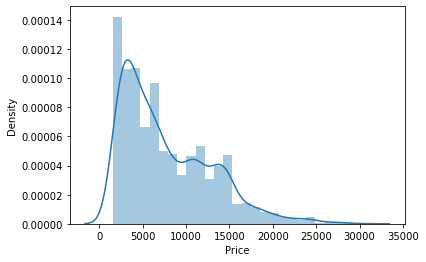

In [55]:
sns.distplot(fDF.Price)

Distribution is skewed and tails of from 15000 mark.

In [56]:
fDF.Price.skew()

1.0172820592622136

From the graph above it is observed that the Price data forms a continuous distribution with mean of 7748.33 and tails off from 15000 mark.

#### Analyzing the Feature Columns

In [57]:
fDF.dtypes[fDF.dtypes == 'object'] #Identifying the Categorical Columns

Airline              object
Flight Number        object
Date of Departure    object
From                 object
To                   object
Total Stops          object
Day                  object
Month                object
dtype: object

In [58]:
fDF['Airline'].value_counts()

IndiGo       917
Air India    496
Vistara      410
Go First     308
Air Asia     249
SpiceJet     200
TruJet         5
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='count'>

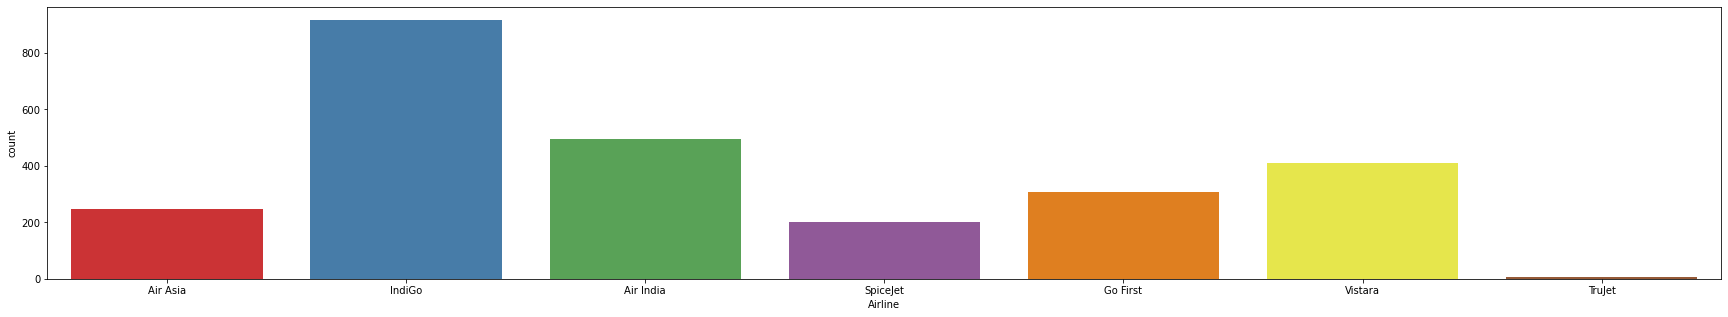

In [59]:
plt.figure(figsize=(30,5),facecolor='white')
sns.countplot(fDF['Airline'], palette="Set1")

IndiGo has the highest number of flights followed by Air India and Vistara

<AxesSubplot:xlabel='count', ylabel='From'>

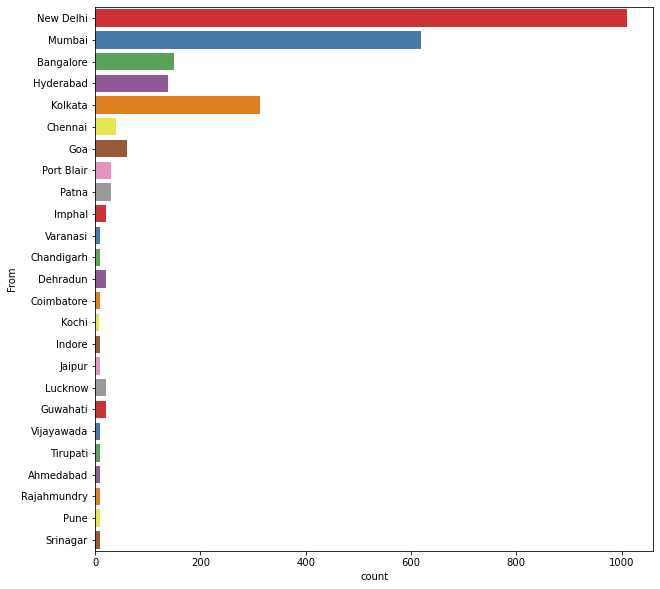

In [60]:
plt.figure(figsize=(10,10),facecolor='white')
sns.countplot(y=fDF['From'], palette="Set1")

Highest number of flights are from Delhi followed by Mumbai, Kolkata,Bangalore and Hyderabad

<AxesSubplot:xlabel='count', ylabel='To'>

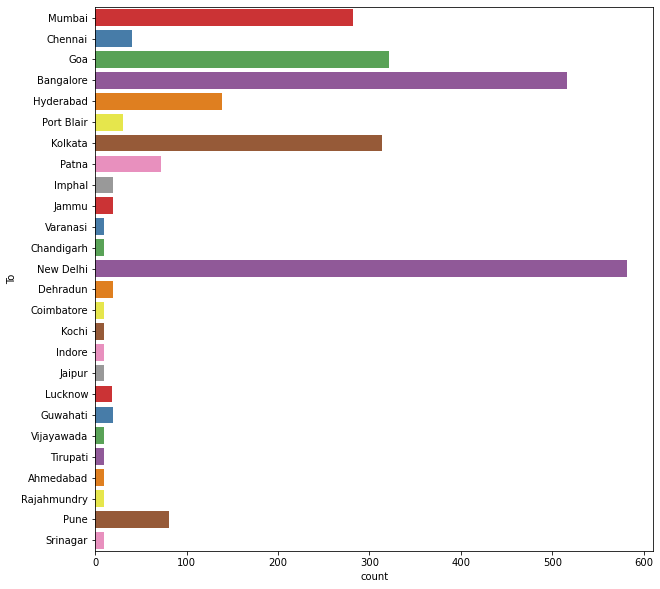

In [61]:
plt.figure(figsize=(10,10),facecolor='white')
sns.countplot(y=fDF['To'], palette="Set1")

New Delhi is the most popular destination followed by Bangalore, Goa, Kolkata and Mumbai

<AxesSubplot:xlabel='Total Stops', ylabel='count'>

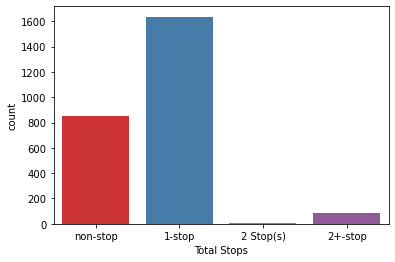

In [62]:
sns.countplot(fDF['Total Stops'], palette="Set1")

Highest number of flights have only 1 stop between source and destination while 2nd highest number of flights are non stop

### Interpreting Relationship between Independent  and Dependent Variables

#### Analyzing Relationship between Day, Month columns and Price

Text(0.5, 1.0, 'Price Trend')

<Figure size 1440x3024 with 0 Axes>

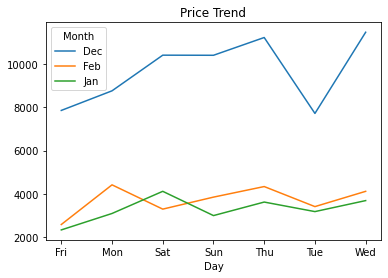

In [63]:
plt.figure(figsize=(20,42))
fDF.groupby(['Day','Month']).mean()['Price'].unstack().plot()
plt.title('Price Trend')

<AxesSubplot:xlabel='Day', ylabel='Price'>

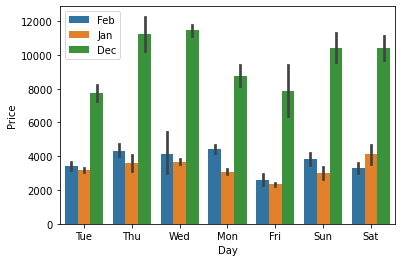

In [64]:
sns.barplot(fDF['Day'],fDF['Price'],hue=Month)

From above graphs it can be observed that on an average, there is a steady decline in Flight price from December to February, with the prices being lowest in January.

From above graphs it can be observed that Flight Prices increase on an average, as the day of departure gets nearer. 

Flight Ticket prices are the highest on Thursdays,Mondays and during the Weekend on an average.

#### Analyzing Relationship between Airlines and Price

Text(0.5, 1.0, 'Price Trend')

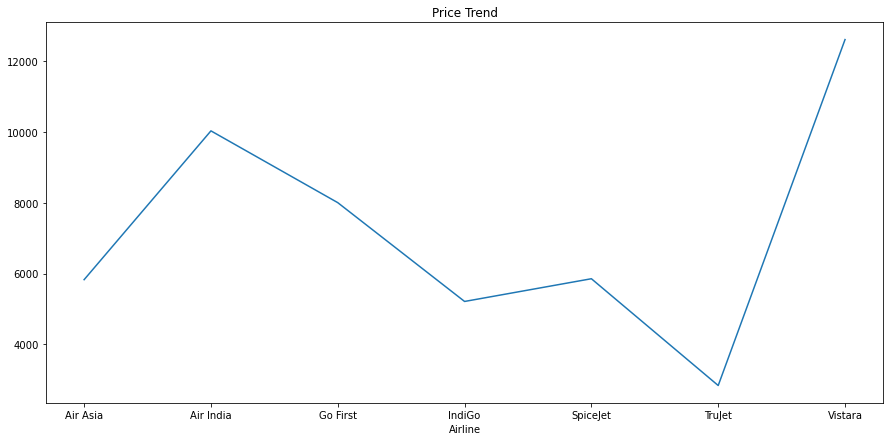

In [65]:
fig, ax = plt.subplots(figsize=(15,7))
fDF.groupby(['Airline']).mean()['Price'].plot(ax=ax)
plt.title('Price Trend')

#Airlines vs Price

Text(0.5, 1.0, 'Price Trend')

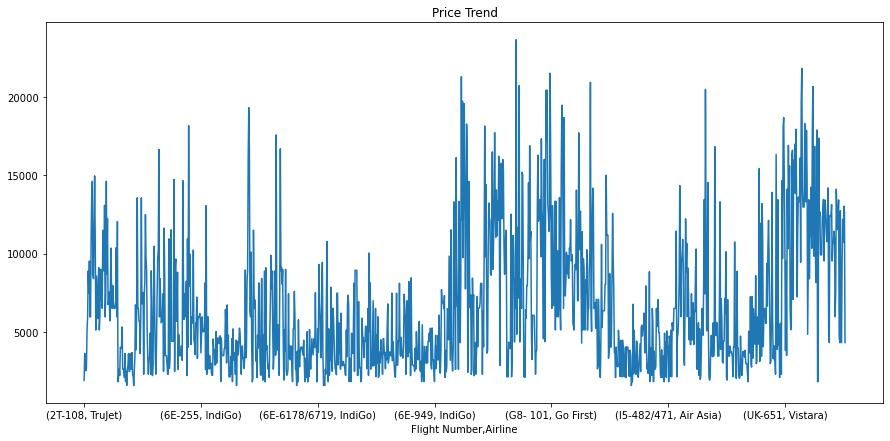

In [66]:
fig, ax = plt.subplots(figsize=(15,7))
fDF.groupby(['Flight Number','Airline'])['Price'].mean().plot(ax=ax)
plt.title('Price Trend')

# Flight numbers vs Price

Trujet, IndiGo,SpiceJet and Air Asia offer air tickets at the most affordable prices on average, whereas Vistara, Air India are the most expensive on average.

Text(0.5, 1.0, 'Price Trend')

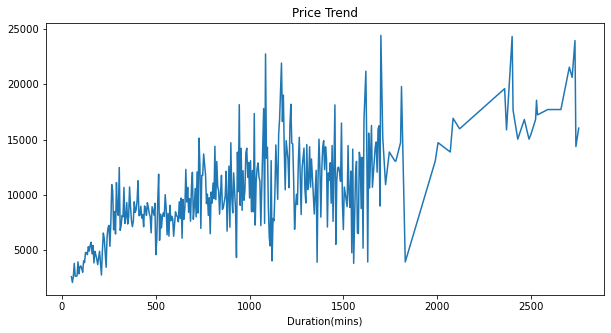

In [67]:
plt.figure(figsize=(10,5))
fDF.groupby('Duration(mins)')['Price'].mean().plot()
plt.title('Price Trend')

Text(0.5, 1.0, 'Duration vs Stops')

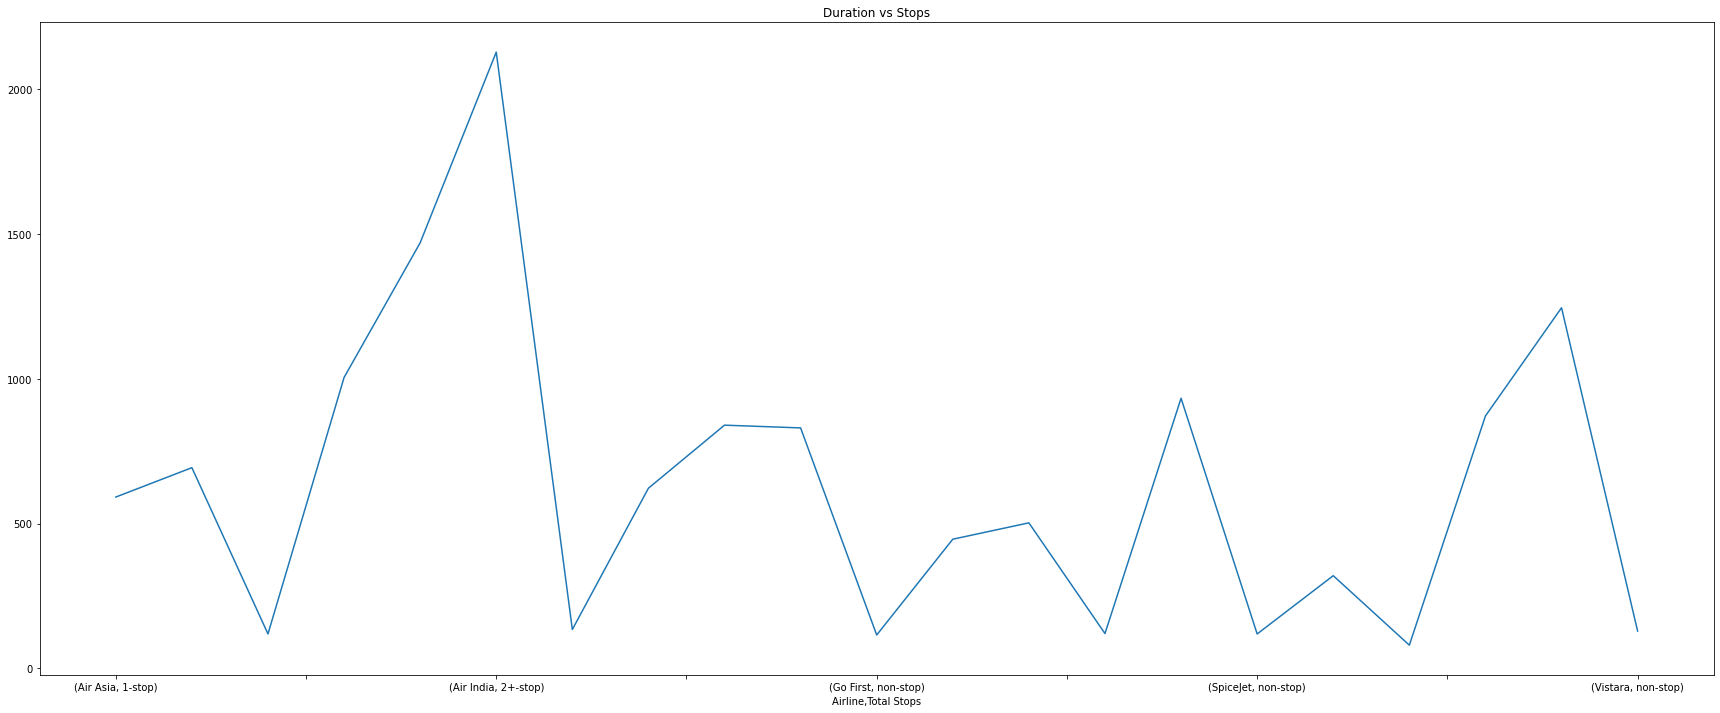

In [70]:
plt.figure(figsize=(30,12))
fDF.groupby(['Airline','Total Stops'])['Duration(mins)'].mean().plot()
plt.title('Duration vs Stops')

It can be observed that Number of Stops impact the travel time of Airlines

Text(0.5, 1.0, 'Price vs Stops')

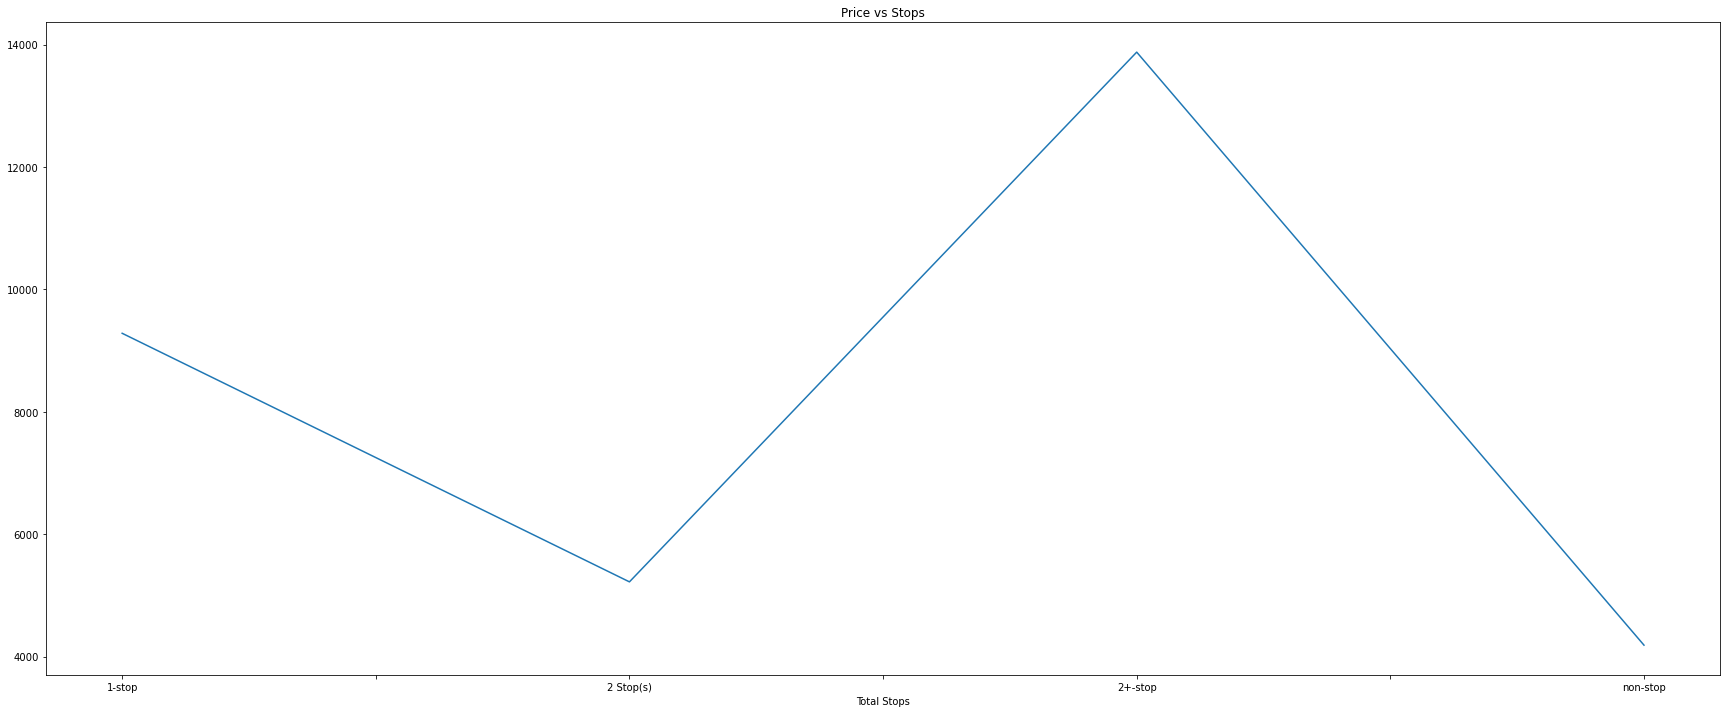

In [69]:
plt.figure(figsize=(30,12))
fDF.groupby(['Total Stops'])['Price'].mean().plot()
plt.title('Price vs Stops')

It can be observed that Number of Stops impact the Air Ticket Pricing of Airlines

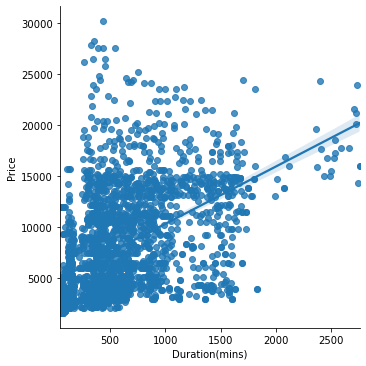

In [71]:
sns.lmplot(x="Duration(mins)", y="Price", data=fDF)

There is a linear relationship between Price and flight duration.

<AxesSubplot:xlabel='To', ylabel='Price'>

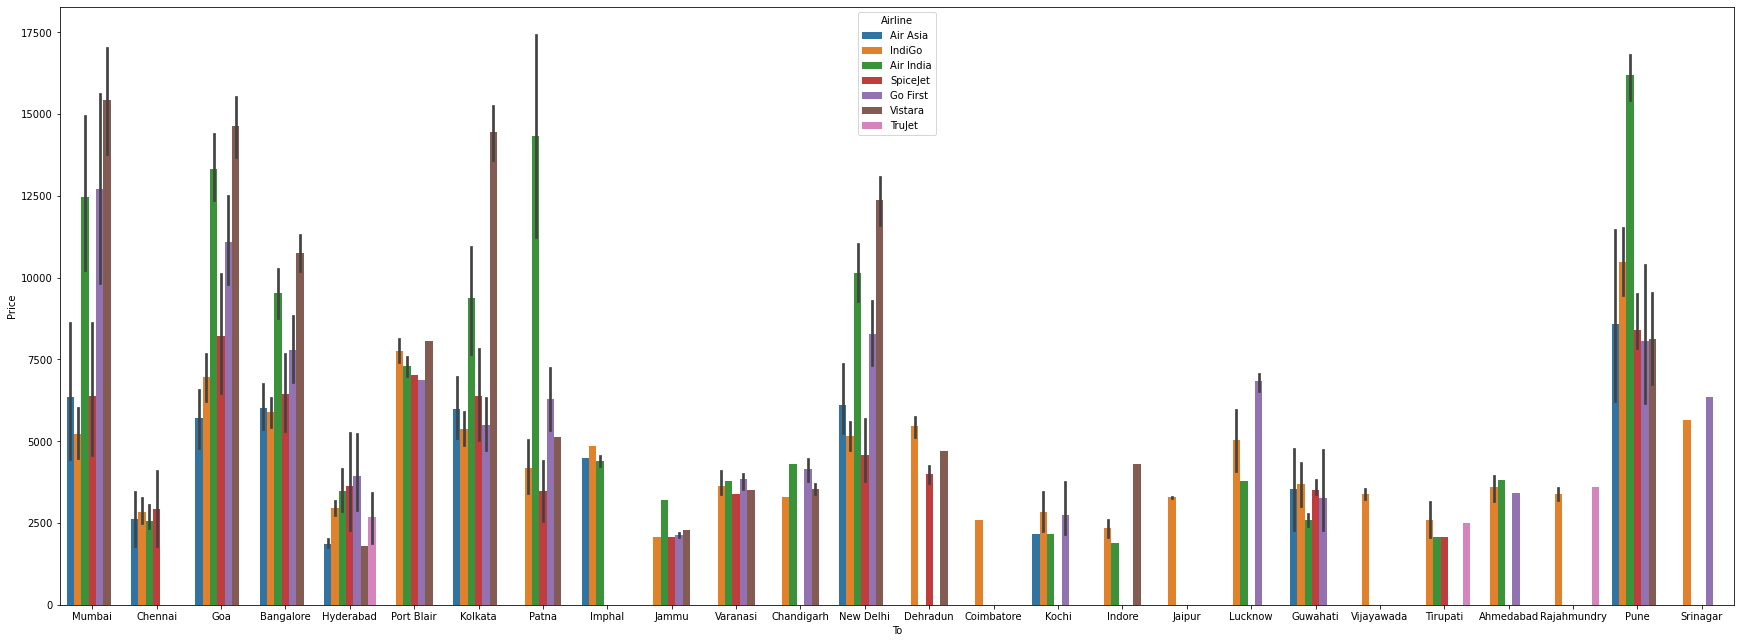

In [72]:
plt.figure(figsize=(30,11),facecolor='white')
sns.barplot(fDF['To'],fDF['Price'],hue=fDF['Airline'])

Goa,Mumbai,Pune,Bangalore,Kolakata,Port Blair,New Delhi are the most expensive destinations while,Kochi, Coimbatore,Jammu,Chennai,Hyderabad,Indore,Tirupati are the most affordable destinations

Indigo,Air Asia and Spicejet provide most affordable Airtickets to the destinations

### Checking for Outliers in continuous data type Features.

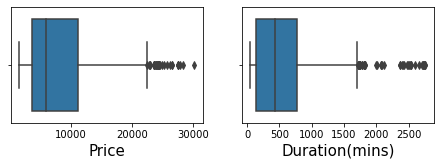

In [73]:
plt.figure(figsize=(20,20),facecolor='white')
plotnum=1
for col in fDF[['Price','Duration(mins)']]:
    if plotnum<=34:
        plt.subplot(8,5,plotnum)
        sns.boxplot(fDF[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

There are outliers in all of the above columns

#### Removing Outliers using Z score Method

In [74]:
df2 =fDF[['Duration(mins)']].copy() #making a copy of the continuous data type column.

In [75]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [76]:
df3.shape

(2559, 1)

In [77]:
df2.shape

(2585, 1)

##### Data loss %:

In [78]:
loss=(2585-2559)/2585 * 100
loss

1.0058027079303675

1% Data loss is within acceptable range

#### Using Z score method to reduce outliers since it has a low data loss %

In [79]:
dropindx = fDF.index.difference(df3.index)

In [80]:
dropindx

Int64Index([1840, 1917, 1918, 1984, 1987, 1988, 1989, 1990, 1991, 1992, 1994,
            1995, 1997, 1998, 1999, 2217, 2218, 2222, 2223, 2226, 2227, 2229,
            2234, 2368, 2388, 2390],
           dtype='int64')

In [81]:
fDF.drop(dropindx,inplace = True) #dropping the outliers from original features Dataframe


In [82]:
fDF.reset_index(drop=True,inplace = True) #resetting the index of the dataframe

In [83]:
fDF

,Airline,Flight Number,Date of Departure,From,To,Total Stops,Price,Day,Date,Month,Duration(mins)
0,Air Asia,I5-764,"Tue, Feb 8",New Delhi,Mumbai,non-stop,2456,Tue,8,Feb,130
1,IndiGo,6E-2054,"Tue, Feb 8",New Delhi,Mumbai,non-stop,2456,Tue,8,Feb,130
2,IndiGo,6E-5001,"Tue, Feb 8",New Delhi,Mumbai,non-stop,2456,Tue,8,Feb,130
3,IndiGo,6E-2046,"Tue, Feb 8",New Delhi,Mumbai,non-stop,2456,Tue,8,Feb,130
4,IndiGo,6E-5328,"Tue, Feb 8",New Delhi,Mumbai,non-stop,2456,Tue,8,Feb,135
...,...,...,...,...,...,...,...,...,...,...,...
2554,Vistara,UK-613,"Tue, Dec 7",Mumbai,Bangalore,2+-stop,15581,Tue,7,Dec,490
2555,Vistara,UK-653,"Tue, Dec 7",Mumbai,Bangalore,1-stop,15603,Tue,7,Dec,735
2556,Air India,AI-675,"Tue, Dec 7",Mumbai,Bangalore,1-stop,15498,Tue,7,Dec,1030
2557,Vistara,UK-651,"Tue, Dec 7",Mumbai,Bangalore,1-stop,17283,Tue,7,Dec,1570


<AxesSubplot:xlabel='Duration(mins)'>

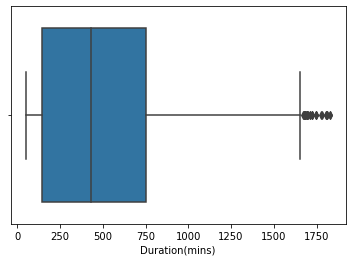

In [84]:
sns.boxplot(fDF['Duration(mins)'])

A lot of outliers have been removed.

### Checking for skewness in data distributions

In [85]:
fDF['Duration(mins)'].skew()

1.0460341498757635

#### Normalizing Data Distribution using PowerTransformer

In [86]:
from sklearn.preprocessing import PowerTransformer

In [87]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [88]:
df4 = fDF[['Duration(mins)']]

In [89]:
transformed= powtrans.fit_transform(df4)

In [90]:
type(transformed)

numpy.ndarray

In [91]:
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe


In [92]:
transformed.skew()

Duration(mins)   -0.042295
dtype: float64

In [93]:
transformed.index = fDF.index

In [94]:
fDF[['Duration(mins)']] = transformed[['Duration(mins)']]

In [95]:
fDF['Duration(mins)'].skew()

-0.042295196395144695

A lot of skewness has been removed.

### Encoding Categorical Columns

####  Encoding using get_dummies()

In [96]:
fDF

,Airline,Flight Number,Date of Departure,From,To,Total Stops,Price,Day,Date,Month,Duration(mins)
0,Air Asia,I5-764,"Tue, Feb 8",New Delhi,Mumbai,non-stop,2456,Tue,8,Feb,-1.110073
1,IndiGo,6E-2054,"Tue, Feb 8",New Delhi,Mumbai,non-stop,2456,Tue,8,Feb,-1.110073
2,IndiGo,6E-5001,"Tue, Feb 8",New Delhi,Mumbai,non-stop,2456,Tue,8,Feb,-1.110073
3,IndiGo,6E-2046,"Tue, Feb 8",New Delhi,Mumbai,non-stop,2456,Tue,8,Feb,-1.110073
4,IndiGo,6E-5328,"Tue, Feb 8",New Delhi,Mumbai,non-stop,2456,Tue,8,Feb,-1.073606
...,...,...,...,...,...,...,...,...,...,...,...
2554,Vistara,UK-613,"Tue, Dec 7",Mumbai,Bangalore,2+-stop,15581,Tue,7,Dec,0.280549
2555,Vistara,UK-653,"Tue, Dec 7",Mumbai,Bangalore,1-stop,15603,Tue,7,Dec,0.752565
2556,Air India,AI-675,"Tue, Dec 7",Mumbai,Bangalore,1-stop,15498,Tue,7,Dec,1.163452
2557,Vistara,UK-651,"Tue, Dec 7",Mumbai,Bangalore,1-stop,17283,Tue,7,Dec,1.700784


In [97]:
dumm = pd.get_dummies(fDF[['Airline','Total Stops','Day','Month']],drop_first = False)

In [98]:
dumm

,Airline_Air Asia,Airline_Air India,Airline_Go First,Airline_IndiGo,Airline_SpiceJet,Airline_TruJet,Airline_Vistara,Total Stops_1-stop,Total Stops_2 Stop(s),Total Stops_2+-stop,...,Day_Fri,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,Month_Dec,Month_Feb,Month_Jan
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2554,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
2555,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,1,0,0
2556,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
2557,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,1,0,0


In [99]:
fDF = fDF.join(dumm)

In [100]:
fDF.drop(columns = ['Airline','Flight Number','Total Stops','Day','Month'],inplace=True) #Dropping the columns since they are no longer needed

In [101]:
fDF

,Date of Departure,From,To,Price,Date,Duration(mins),Airline_Air Asia,Airline_Air India,Airline_Go First,Airline_IndiGo,...,Day_Fri,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,Month_Dec,Month_Feb,Month_Jan
0,"Tue, Feb 8",New Delhi,Mumbai,2456,8,-1.110073,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,"Tue, Feb 8",New Delhi,Mumbai,2456,8,-1.110073,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
2,"Tue, Feb 8",New Delhi,Mumbai,2456,8,-1.110073,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,"Tue, Feb 8",New Delhi,Mumbai,2456,8,-1.110073,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,"Tue, Feb 8",New Delhi,Mumbai,2456,8,-1.073606,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2554,"Tue, Dec 7",Mumbai,Bangalore,15581,7,0.280549,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2555,"Tue, Dec 7",Mumbai,Bangalore,15603,7,0.752565,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2556,"Tue, Dec 7",Mumbai,Bangalore,15498,7,1.163452,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
2557,"Tue, Dec 7",Mumbai,Bangalore,17283,7,1.700784,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [102]:
fDF.drop(columns = ['Date of Departure'],inplace=True) #dropping 'Date of Departure' column since it is no longer needed

In [103]:
fDF

,From,To,Price,Date,Duration(mins),Airline_Air Asia,Airline_Air India,Airline_Go First,Airline_IndiGo,Airline_SpiceJet,...,Day_Fri,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,Month_Dec,Month_Feb,Month_Jan
0,New Delhi,Mumbai,2456,8,-1.110073,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,New Delhi,Mumbai,2456,8,-1.110073,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,New Delhi,Mumbai,2456,8,-1.110073,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,New Delhi,Mumbai,2456,8,-1.110073,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,New Delhi,Mumbai,2456,8,-1.073606,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2554,Mumbai,Bangalore,15581,7,0.280549,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2555,Mumbai,Bangalore,15603,7,0.752565,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2556,Mumbai,Bangalore,15498,7,1.163452,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2557,Mumbai,Bangalore,17283,7,1.700784,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


#### Encoding Columns 'From' and 'To' using Label Encoder

In [104]:
from sklearn.preprocessing import LabelEncoder

In [105]:
labenc = LabelEncoder()

In [106]:
for col in fDF[['From','To']]:
    fDF[col] = labenc.fit_transform(fDF[col])

In [107]:
fDF

,From,To,Price,Date,Duration(mins),Airline_Air Asia,Airline_Air India,Airline_Go First,Airline_IndiGo,Airline_SpiceJet,...,Day_Fri,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,Month_Dec,Month_Feb,Month_Jan
0,16,16,2456,8,-1.110073,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,16,16,2456,8,-1.110073,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,16,16,2456,8,-1.110073,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,16,16,2456,8,-1.110073,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,16,16,2456,8,-1.073606,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2554,15,1,15581,7,0.280549,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2555,15,1,15603,7,0.752565,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2556,15,1,15498,7,1.163452,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2557,15,1,17283,7,1.700784,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


### Finding Correlation 

In [108]:
f_corr =fDF.corr()

In [109]:
f_corr

,From,To,Price,Date,Duration(mins),Airline_Air Asia,Airline_Air India,Airline_Go First,Airline_IndiGo,Airline_SpiceJet,...,Day_Fri,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,Month_Dec,Month_Feb,Month_Jan
From,1.000000,-0.154989,0.369458,-0.382787,0.170938,-0.053284,0.115498,0.024481,-0.161003,-0.072426,...,-0.079648,-0.097001,0.055610,-0.053763,-0.041623,-0.107776,0.218460,0.353308,-0.163135,-0.270022
To,-0.154989,1.000000,0.014258,-0.029403,-0.040379,-0.046113,0.045408,-0.033363,0.064673,-0.015427,...,0.105685,0.127347,0.159693,0.162299,-0.010714,-0.214989,-0.131483,-0.208065,0.191125,0.078283
Price,0.369458,0.014258,1.000000,-0.544935,0.534898,-0.117998,0.187379,0.025758,-0.359282,-0.103132,...,-0.184440,-0.119758,0.068844,0.019023,-0.050746,-0.213920,0.340239,0.627020,-0.301848,-0.468738
Date,-0.382787,-0.029403,-0.544935,1.000000,-0.215920,0.006907,-0.020140,-0.069346,0.216305,0.058625,...,0.133924,0.185523,-0.004687,0.050180,0.297105,0.048377,-0.469579,-0.435464,0.380521,0.180395
Duration(mins),0.170938,-0.040379,0.534898,-0.215920,1.000000,-0.093759,0.246814,-0.003853,-0.340730,0.076118,...,-0.215113,-0.055261,0.078713,-0.020540,-0.008420,-0.034381,0.139451,0.291449,-0.122468,-0.233025
Airline_Air Asia,-0.053284,-0.046113,-0.117998,0.006907,-0.093759,1.000000,-0.156136,-0.121445,-0.245353,-0.095597,...,-0.015205,0.088236,0.023605,-0.038478,-0.030704,-0.047457,0.002931,-0.037006,0.055712,-0.004523
Airline_Air India,0.115498,0.045408,0.187379,-0.020140,0.246814,-0.156136,1.000000,-0.175913,-0.355392,-0.138472,...,-0.047950,-0.008226,-0.020601,-0.048270,0.149959,-0.029002,-0.017049,0.033440,0.093250,-0.117873
Airline_Go First,0.024481,-0.033363,0.025758,-0.069346,-0.003853,-0.121445,-0.175913,1.000000,-0.276430,-0.107706,...,0.027196,-0.016508,-0.001504,0.002335,-0.043548,-0.074380,0.091008,0.122899,-0.107188,-0.051086
Airline_IndiGo,-0.161003,0.064673,-0.359282,0.216305,-0.340730,-0.245353,-0.355392,-0.276430,1.000000,-0.217595,...,0.096154,0.032302,-0.009533,0.077380,-0.014580,0.105218,-0.175047,-0.250783,0.125659,0.183288
Airline_SpiceJet,-0.072426,-0.015427,-0.103132,0.058625,0.076118,-0.095597,-0.138472,-0.107706,-0.217595,1.000000,...,0.006775,-0.050555,-0.030089,0.050798,-0.042624,0.045253,0.023861,-0.108163,-0.068370,0.183154


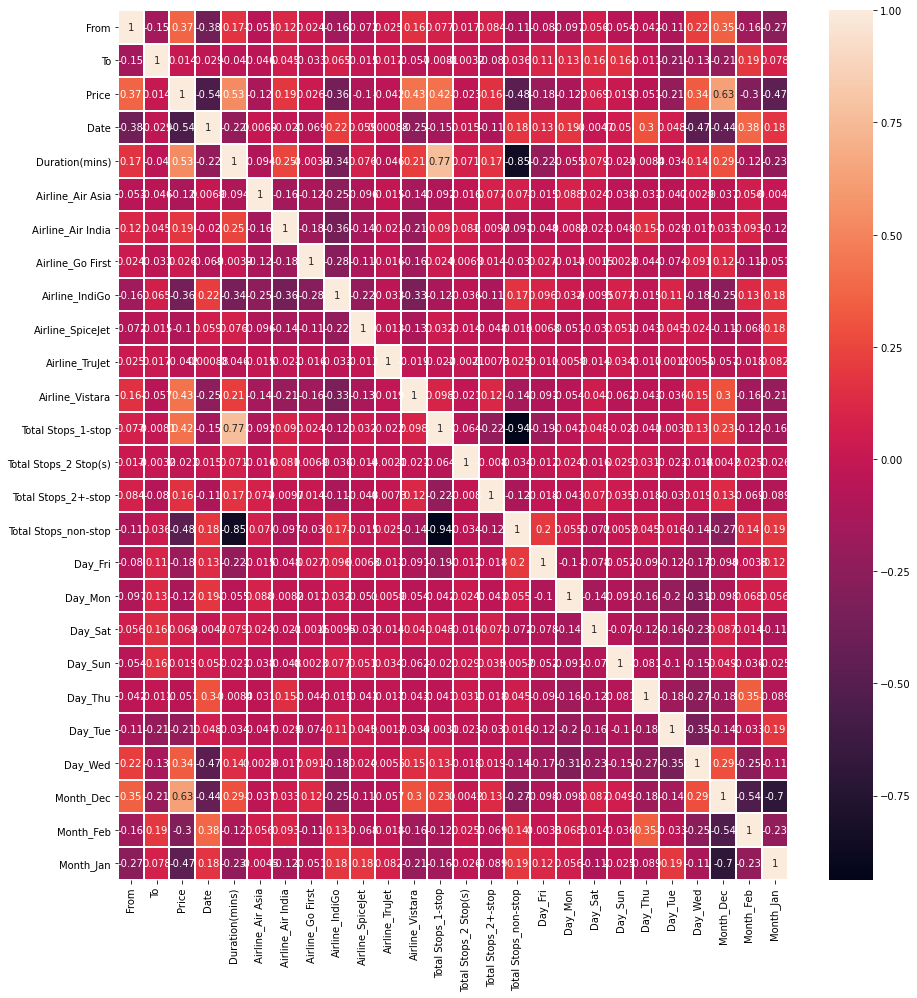

In [110]:
plt.figure(figsize=(15,16))
sns.heatmap(f_corr,annot=True,linewidth=1)
plt.show()

### Visualizing correlation of feature columns with label column.

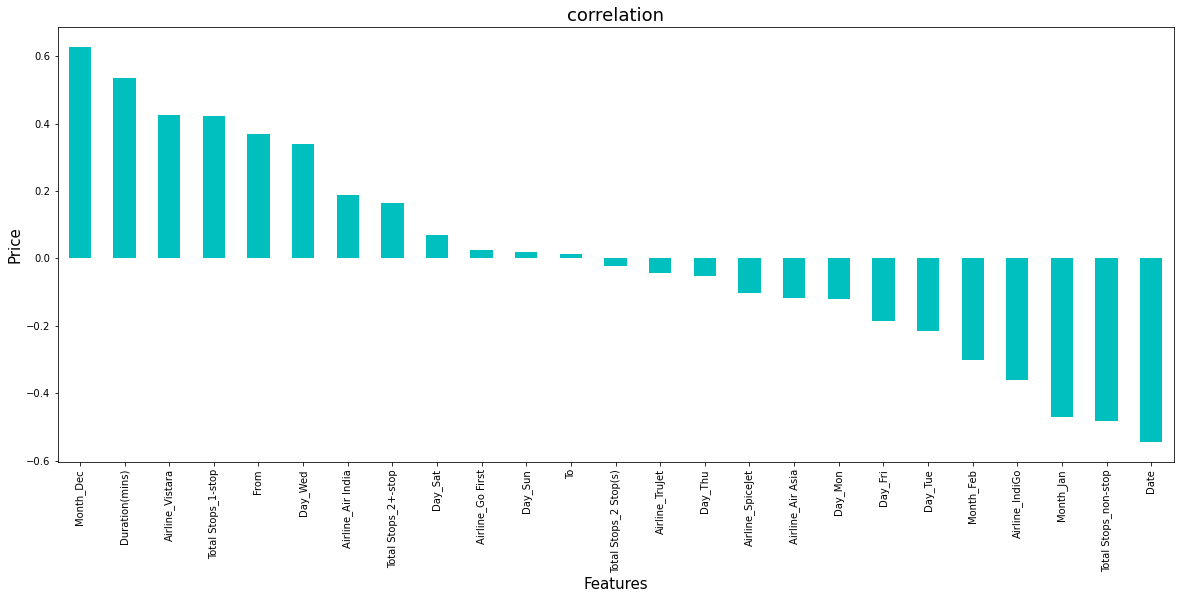

In [111]:
plt.figure(figsize = (20,8))
fDF.corr()['Price'].sort_values(ascending = False).drop(['Price']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

It is observed that Month_Dec, Duration(mins), Airline_Vistara,Total Stops_1-stop and From have the highest positive correlation with Price, while Date,Total Stops_non-stop,Month_Jan,Airline_IndiGo have the highest negative correlation with Price

### Feature Selection

In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
X = fDF.drop(columns = ['Price'])
y = fDF['Price']

In [114]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

### Checking for Multicollinearity using Variance Inflation Factor

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [116]:
vif = pd.DataFrame()

In [117]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [118]:
vif

,Features,vif
0,From,1.318911e+00
1,To,1.348669e+00
2,Date,1.868083e+00
3,Duration(mins),4.960548e+00
4,Airline_Air Asia,3.736635e+04
5,Airline_Air India,3.209639e+04
6,Airline_Go First,2.182494e+04
7,Airline_IndiGo,7.844029e+03
8,Airline_SpiceJet,3.295800e+04
9,Airline_TruJet,7.392003e+05


MultiCollinearity exists amongst many columns, Based on ANOVA F scores, columns scoring the lowest will be dropped.

### Selecting Kbest Features

In [119]:
from sklearn.feature_selection import SelectKBest, f_classif

In [120]:
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [121]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(30,'Score'))

                  Feature      Score
9          Airline_TruJet        inf
0                    From  41.486575
22              Month_Dec  37.028388
1                      To  26.240629
2                    Date  22.717439
16                Day_Mon  16.746133
24              Month_Jan  16.247766
6        Airline_Go First  16.073793
20                Day_Tue  15.351781
23              Month_Feb  14.826002
14   Total Stops_non-stop  14.716053
21                Day_Wed  13.739715
15                Day_Fri  13.226804
3          Duration(mins)  13.062249
11     Total Stops_1-stop  12.652553
8        Airline_SpiceJet  11.785737
19                Day_Thu  10.986718
17                Day_Sat   9.565095
5       Airline_Air India   8.015505
10        Airline_Vistara   6.796589
7          Airline_IndiGo   6.630233
18                Day_Sun   6.271130
12  Total Stops_2 Stop(s)   5.512608
4        Airline_Air Asia   5.437334
13    Total Stops_2+-stop   5.425903


#### Selecting best features based on their scores:

In [122]:
x_best = X.drop(columns=['Airline_TruJet']).copy()

In [123]:
scaled_x_best = scaler.fit_transform(x_best)

### This is a Regression Problem since Target/ Label column ('Price') has Continuous type of Data.


## Regression Model Building

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
from sklearn.metrics import r2_score

#### Finding the Best Random State

In [754]:
from sklearn.ensemble import RandomForestRegressor
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .25, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8232413568072626 on random_state: 58


In [755]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .25, random_state =58)

In [756]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR



In [757]:
from sklearn.metrics import r2_score,mean_squared_error

In [758]:
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
xg = XGBRegressor()
SV= SVR()
r=Ridge()

### Training the Models

In [759]:
rf.fit(x_train,y_train)
xg.fit(x_train,y_train)
SV.fit(x_train,y_train)
r.fit(x_train,y_train)
dt.fit(x_train,y_train)

DecisionTreeRegressor()

All models have been trained.

### Ridge Regression Model

In [760]:
y_r_pred = r.predict(x_test)

####  R2 Score

In [761]:
r2_score(y_test,y_r_pred)

0.7058259974328807

#### Mean Squared Error 

In [762]:
mean_squared_error(y_test,y_r_pred)

7357205.386648208

#### Root Mean Squared Error

In [763]:
np.sqrt(mean_squared_error(y_test,y_r_pred))

2712.416890274835

###  Random Forest Regression Model

In [764]:
y_rf_pred = rf.predict(x_test)

#### R2 Score

In [765]:
r2_score(y_test,y_rf_pred)

0.8156395994141425

#### Mean Squared Error

In [766]:
mean_squared_error(y_test,y_rf_pred)

4610799.46031403

#### Root Mean Squared Error

In [767]:
np.sqrt(mean_squared_error(y_test,y_rf_pred))

2147.2772201823477

### XGB Regression Model 

In [768]:
y_xg_pred = xg.predict(x_test)

####  R2 Score

In [769]:
r2_score(y_test,y_xg_pred)

0.8098289634792951

#### Mean Squared Error

In [770]:
mean_squared_error(y_test,y_xg_pred)

4756121.758092391

#### Root Mean Squared Error

In [771]:
np.sqrt(mean_squared_error(y_test,y_xg_pred))

2180.853447183554

### Support Vector Regression Model

In [772]:
y_svr_pred = SV.predict(x_test)

####  R2 Score

In [773]:
r2_score(y_test,y_svr_pred)

-0.07322019200984475

#### Mean Squared Error

In [774]:
mean_squared_error(y_test,y_svr_pred)

26840921.72935272

#### Root Mean Squared Error

In [775]:
np.sqrt(mean_squared_error(y_test,y_svr_pred))

5180.822495449223

###  Decision Tree Regression Model

In [776]:
y_dt_pred = dt.predict(x_test)

####  R2 Score

In [777]:
r2_score(y_test,y_dt_pred)

0.7254430163703851

#### Mean Squared Error

In [778]:
mean_squared_error(y_test,y_dt_pred)

6866589.505783421

#### Root Mean Squared Error

In [779]:
np.sqrt(mean_squared_error(y_test,y_dt_pred))

2620.4178113009807

### Model Cross Validation

In [780]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

#### Ridge Regression

In [781]:
cross_val_score(r,scaled_x_best,y,cv=ShuffleSplit(5)).mean()

0.6751796574676406

#### Random Forest Regression

In [782]:
cross_val_score(rf,scaled_x_best,y,cv=ShuffleSplit(5)).mean()

0.7725019082554441

#### XGB Regression

In [783]:
cross_val_score(xg,scaled_x_best,y,cv=ShuffleSplit(5)).mean()

0.7703442726148106

#### SV Regression

In [784]:
cross_val_score(SV,scaled_x_best,y,cv=ShuffleSplit(5)).mean()

-0.0679274891100552

#### Decision Tree Regression

In [785]:
cross_val_score(dt,scaled_x_best,y,cv=ShuffleSplit(5)).mean()

0.6749385369081847

### Based on comparing Accuracy Score results with Cross Validation results, it is determined that Random Forest Regressor is the best model. It also has the lowest Root Mean Squared Error score

### Hyper Parameter Tuning

In [806]:
from sklearn.model_selection import GridSearchCV

In [807]:
parameter = {'n_estimators':[30,60,80],'max_depth': [40,50,80],'min_samples_leaf':[5,10,20],'min_samples_split':[2,5,10],'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

In [808]:
GridCV = GridSearchCV(RandomForestRegressor(),parameter,cv=ShuffleSplit(5),n_jobs = -1,verbose = 1)

In [809]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=None, train_size=None),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [40, 50, 80],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [30, 60, 80]},
             verbose=1)

In [810]:
GridCV.best_params_

{'criterion': 'mse',
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 80}

In [811]:
Best_mod = RandomForestRegressor(n_estimators = 80,criterion = 'mse', max_depth= 80, max_features = 'auto',min_samples_leaf = 5, min_samples_split = 2)

Best_mod.fit(x_train,y_train)

RandomForestRegressor(max_depth=80, min_samples_leaf=5, n_estimators=80)

In [812]:
rfpred = Best_mod.predict(x_test)
acc = r2_score(y_test,rfpred)
print(acc*100)

83.55267438661498


##### Random Forest Regressor has an accuracy of 83.55%

#### Saving The Model

In [813]:
import joblib
joblib.dump(Best_mod,"BestModelFlight.pkl")

['BestModelFlight.pkl']

#### Loading The Model

In [814]:
mod=joblib.load("BestModelFlight.pkl")

In [815]:
print(mod.predict(scaled_x_best))

[ 2464.68359849  2462.60656102  2462.60656102 ... 10859.22397797
 11834.36066996 12464.65081887]


In [818]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(scaled_x_best), 'Actual Values': y})
Prediction_accuracy.head(30)

,Predictions,Actual Values
0,2464.683598,2456
1,2462.606561,2456
2,2462.606561,2456
3,2462.606561,2456
4,2472.924672,2456
5,2470.397408,2456
6,2527.726671,2456
7,2527.726671,2456
8,2648.920489,2456
9,2648.920489,2456
